## CISC 614 - Assignment 9
#### Inventory simulation
#### Roman Moser 187700

#### INTRODUCTION
The following report shows an inventory simulation for the case of a business that sells firewood to the general public. The business wants to minimize costs, which occur for each delivery (the more frequent the more expensive) and for the storage (the more is stored the more expensive) while ensuring that there is always some firewood in the inventory. This report shows the implementation of such a simulation with a given distribution of orders and evaluates the average costs and days with no inventory occurred with a varying frequency of deliveries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

#### METHODS
#### 1. Manual calculations vs simulation results
Assume the following parameters:
 - Q = 10 Delivery quantity (US tons of birch firewood))
 - T = 2 Time between deliveries (days))
 - N = 4 (Length of simulation (days))
 - d = 20.0 (Delivery cost (USD dollars per delivery))
 - s = 1.0 (Storage cost (USD per cord of firewood per day))
 - daily demand = 1

#### Day 1:
 - first delivery: 10 tons
 - demand: 1 --> inventory: 10 - 1 = 9
 - delivery costs: 20
 - storage costs: 9 * 1 = 9
 - total costs = 20 + 9 = 29
 - total running costs: 0 + 29 = 29

#### Day 2:
 - no delivery
 - demand: 1 --> inventory: 9 - 1 = 8
 - delivery costs: 0
 - storage costs: 8 * 1 = 8
 - total costs = 0 + 8 = 8
 - total running costs: 29 + 8 = 37
 
#### Day 3:
 - second delivery: 10 tons
 - demand: 1 --> inventory: 18 - 1 = 17
 - delivery costs: 20
 - storage costs: 17 * 1 = 17
 - total costs = 20 + 17 = 37
 - total running costs: 37 + 37 = 74
 
#### Day 4:
 - no delivery
 - demand: 1 --> inventory: 17 - 1 = 16
 - delivery costs: 0
 - storage costs: 16 * 1 = 16
 - total costs = 0 + 16 = 16
 - total running costs: 74 + 16 = 90
 
 This leads to total running costs of 90 and thus average daily costs of 90 / 4 = **22.5**
 
 Now we create the simulation and run it with the same parameters:

In [2]:
class Simulation:
    def __init__(self, Q, T, N, d, s):
        self.Q = Q
        self.T = T
        self.d = d
        self.s = s
        self.remaining_days = N
        self.days_passed = 0
        self.current_inventory = 0
        self.total_running_costs = 0
        self.demand_stock = 0
        self.zero_inv_days = 0
        
    def one_step(self):
        delivery = 0
        if self.days_passed % T == 0:
            delivery = 1
            self.current_inventory += self.Q
        self.current_inventory -= demand(self.demand_stock)
        if self.current_inventory < 0:
            self.zero_inv_days += 1
            self.demand_stock = -self.current_inventory
            self.current_inventory = 0
        else:
            self.demand_stock = 0
        self.days_passed += 1
        self.remaining_days -= 1
        self.total_running_costs += s * self.current_inventory + delivery * self.d
    
    def run_simulation(self):
        while self.remaining_days > 0:
            self.one_step()
        return self.total_running_costs / N, self.zero_inv_days

In [3]:
def demand(demand_stock):
    return 1 + demand_stock
Q = 10
T = 2
N = 4
d = 20.0
s = 1.0
sim = Simulation(Q, T, N, d, s)
daily_avg, _ = sim.run_simulation()
print(f'daily average costs simulation: {daily_avg}')

daily average costs simulation: 22.5


As the simulation returns the same daily average costs we verified that simulation's implementation is correct.

### 2. Generation of historical daily demand rates

The table below shows the distribution of how often (on how many days) specific numbers of cords have been demanded.

#n cords demanded |  #n occurrences |

+---------------------+----------------------+

|          1-2        |         228         |

|          3-4        |         206         |

|          5-6        |          92         |

|          7-8        |          80         |

|         9-10        |          83         |

|        11-12        |          17         |

|        13-14        |          13         |

|        15-16        |          11         |

In the following, we implement a function that generated the same distribution with the help of a random number generator:

In [4]:
def demand(demand_stock=0):
    """
    generate a random number of number of cords demanded based on
    the given distribution
    """
    occur = [228, 206, 92, 80, 83, 17, 13, 11]
    occur_cum = [sum(occur[:i]) for i in range(1, len(occur))] + [sum(occur)]
    rnd = np.random.uniform() * sum(occur)
    if rnd < occur_cum[0]:
        return random.choice([1, 2]) + demand_stock
    elif rnd < occur_cum[1]:
        return random.choice([3, 4]) + demand_stock
    elif rnd < occur_cum[2]:
        return random.choice([5, 6]) + demand_stock
    elif rnd < occur_cum[3]:
        return random.choice([7, 8]) + demand_stock
    elif rnd < occur_cum[4]:
        return random.choice([9, 10]) + demand_stock
    elif rnd < occur_cum[5]:
        return random.choice([11, 12]) + demand_stock
    elif rnd < occur_cum[6]:
        return random.choice([13, 14]) + demand_stock
    else:
        return random.choice([15, 16]) + demand_stock

In [6]:
n = 10_000
n_cords = []
for i in range(n):
    n_cords.append(demand())

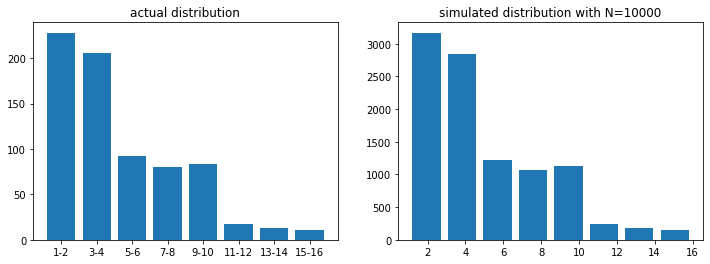

In [7]:
# show plots of distributions:
occur = [228, 206, 92, 80, 83, 17, 13, 11]
occur_label = ['1-2', '3-4', '5-6', '7-8', '9-10', '11-12', '13-14', '15-16']
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.bar(occur_label, occur)
plt.title('actual distribution')
plt.subplot(1, 2, 2)
plt.hist(n_cords, bins=8, rwidth=0.8)
plt.title(f'simulated distribution with N={n}')
plt.show()

As the plots above show, the simulated distribution (generated 10,000 numbers) is very similar to the original distribution.

### 3. Integration

Now we combine the distribution from the second section with the simulation model from the first section. We are first running the simulation 10,000 times with the parameters given in the assignment task and are then testing a variety of different parameters for the time intervall T. (Note that the testing of the simulation with a variety of parameters to  is not included in this report to avoid a lengthy report with lots of duplicate code).

- Q = 150      # Delivery quantity (US tons of birch firewood)
- T = 15       # Time between deliveries (days)
- N = 365      # Length of simulation (days)
- d = 500.00   # Delivery cost (USD dollars per delivery)
- s = 1.50     # Storage cost (USD per cord of firewood per day)


- Assumption: a cord of birch firewood weighs 4,000 pounds
- One pound = 0.4536kg --> Q = (150,000 / 0.4536) / 4000 = 82.67196 cords --> round to 83 cords

In [8]:
Q = 83
T = 15
N = 365
d = 500.0
s = 1.50
n_simulations = 10_000
daily_avg, n_zeros_days = [], []
for i in range(n_simulations):
    sim = Simulation(Q, T, N, d, s)
    d_avg, nzd = sim.run_simulation()
    daily_avg.append(d_avg)
    n_zeros_days.append(nzd)

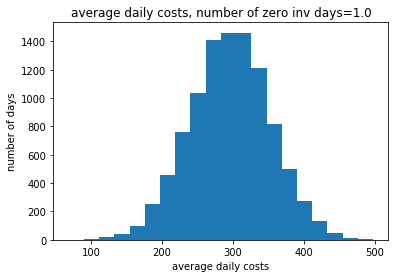

In [9]:
# Plot distribution of average daily costs:
plt.hist(daily_avg, bins=20)
plt.title(f'average daily costs, number of zero inv days={np.round(np.mean(n_zeros_days))}')
plt.xlabel('average daily costs')
plt.ylabel('number of days')
plt.show()

#### Find T that minimzes the costs (while having zero days of zero inventory)
Now we are running the simulation again with the same parameters, but a varying value for T (the time difference between deliveries). The goal is to find the T that minimizes the daily average costs while having zero days of no inventory. For each T, we are running 100 simulations and compute the average daily costs and the average number of zero inventory days. Note that the average number of zero inventory days is rounded to the nearest integer, meaning that if the average is less than 0.5 days, we consider that there are no days with zero inventory. Since the 10,000 simulations above showed that with T=15 days, we have on average 1 day with 0 inventory, we start the range of T's at a significantly lower number.

In [10]:
n_simulations = 100
T_ = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
daily_avg_, n_zero_days_ = [], []
for T in T_:
    daily_avg, n_zero_days = [], []
    for i in range(n_simulations):
        sim = Simulation(Q, T, N, d, s)
        d_avg, nzd = sim.run_simulation()
        daily_avg.append(d_avg)
        n_zero_days.append(nzd)
    daily_avg_.append(np.mean(daily_avg))
    n_zero_days_.append(np.mean(n_zero_days))
    print(f'costs with T={T}: {np.round(np.mean(daily_avg))}, \
    number of days with zero inventory: {np.round(np.mean(n_zero_days))}')

costs with T=5: 3390.0,     number of days with zero inventory: 0.0
costs with T=6: 2608.0,     number of days with zero inventory: 0.0
costs with T=7: 2068.0,     number of days with zero inventory: 0.0
costs with T=8: 1643.0,     number of days with zero inventory: 0.0
costs with T=9: 1328.0,     number of days with zero inventory: 0.0
costs with T=10: 1069.0,     number of days with zero inventory: 0.0
costs with T=11: 856.0,     number of days with zero inventory: 0.0
costs with T=12: 681.0,     number of days with zero inventory: 0.0
costs with T=13: 526.0,     number of days with zero inventory: 0.0
costs with T=14: 407.0,     number of days with zero inventory: 0.0
costs with T=15: 302.0,     number of days with zero inventory: 2.0
costs with T=16: 209.0,     number of days with zero inventory: 5.0
costs with T=17: 115.0,     number of days with zero inventory: 52.0
costs with T=18: 69.0,     number of days with zero inventory: 152.0
costs with T=19: 46.0,     number of days wit

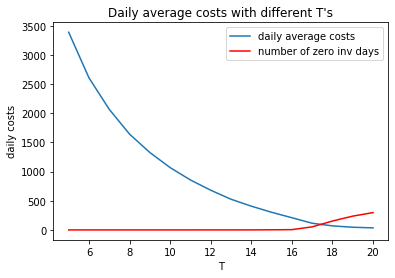

In [11]:
plt.plot(T_, daily_avg_)
plt.plot(T_, n_zero_days_, color='red')
plt.title("Daily average costs with different T's")
plt.legend(['daily average costs', 'number of zero inv days'])
plt.xlabel('T')
plt.ylabel('daily costs')
plt.show()

#### CONCLUSION
The plot above shows that the daily average costs increase exponentially as the time between deliveries decreases. We obtain the minimum daily average costs with T=14 of 407. With a T of 15 or higher, the costs further decrease, however, the number of days with an inventory of zero becomes greater than 0. A suggestion to imporove the simulation and the analysis of the results would be to introduce an additional cost as punishment for an inventory of zero. This would make sense because, in reality there is a slight chance of some days with 0 inventory (as long as T is not very small in which case unnecessary high costs occur). With a costs for zero inventory days we would be able to find the ideal T for more aggressive (if costs of zero inventory low) and more conservative (if costs of zero inventory high) strategies.